# レシピ1-2初めてのIPython探索データ分析

Numpy, pandas, matplotlibパッケージをインポートする。

matplotlib描写はnotebookのインラインで行うように指示を加える。

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

次にＣＳＶデータファイルのアドレスを変数urlに割り当てる

In [16]:
url = "https://github.com/ipython-books/cookbook-data/raw/master/bikes.csv"

pandasにはCSVファイルを読み込むread_csv()関数が用意されている。

ここではファイルのＵＲＬを渡すとpandasがワイルを読み込み、構文分析をおこない、DataFrameオブジェクトを返す。

日付のデータが正しく解釈されるように、オプションをいくつか指定する。

In [17]:
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)

2次元表データを保持するためのpandasデータ構造であるDataFrameオブジェクトが、変数dfに格納されている。

head(n)関数は票の最初のn行を表示する。

notebookでは、次の例のようにDataFrameオブジェクトをHTMLの表として表示する。

In [18]:
df.head(2)

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0


describe()メソッドにより、要約統計量を算出する。

In [19]:
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


次にグラフを表示する。

2つの道路を選び、日別の自転車走行数をプロットする。

最初に2つの列「Berri1」と「PierDup」を選択し、plot()関数を呼ぶ。

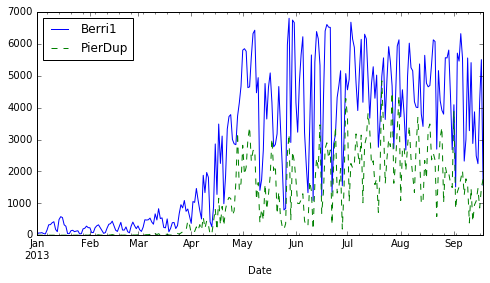

In [22]:
df[['Berri1', 'PierDup']].plot(figsize=(8,4),
                               style=['-', '--']);

次にもう少し高度な分析を行う。

路上の自転車走行数を曜日の関数としてみる。

pandasを使って曜日を求める。

DataFrameオブジェクトの各行索引(index)は日付であるため、索引は曜日など日付関係の属性が含まれる。

In [23]:
df.index.weekday

array([1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2], dtype=int32)

曜日の値として0から6の数値よりも(月、火、水…)などの名称を使う方が望ましい。

曜日名の配列を作り、df.index.weekdauの値を使って配列要素を取り出す。

これより日付索引に付随している曜日の属性を表す整数は曜日の名称に変換される。

0は月曜日にそうとうするため、df.index.weekdayの値0は"Monday"に変換する。

同様に残りの曜日も変換を行い、DataFrameの新しい列Weekdayに設定する

In [24]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 
                 'Sunday'])
df['Weekday'] = days[df.index.weekday]

自転車の通行量を曜日の関数とするため、表の要素を曜日でまとめる必要がある。

groupby()はそのための関数である。まとめてから、合計する

In [25]:
df_week = df.groupby('Weekday').sum()

In [26]:
df_week

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Weekday,,,,,,,,
Friday,105701,44252,71605,127526,64385,36850,118556,71426
Monday,106826,51646,68087,129982,69767,44500,119211,72883
Saturday,75754,27226,45947,79743,35544,46149,97143,56438
Sunday,74873,29181,40812,75746,37620,53812,100735,53798
Thursday,115193,52340,76273,141424,73668,36349,120684,74540
Tuesday,117244,54656,76974,141217,74299,40679,123533,76559
Wednesday,120434,59604,79033,145860,80437,42564,125173,79501


次にをこのデータをグラフに表示する。

